KNN 알고리즘으로 모델 구성해보기

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap,BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing, datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
iris=datasets.load_iris()
data,targets=iris["data"],iris["target"]
train_data,test_data,train_targets,test_targets=train_test_split(data,targets,random_state=33,test_size=0.1)

#트레인데이터 및 테스트데이터 정규화
scaler=preprocessing.StandardScaler().fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

knn=neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data,train_targets)

KNeighborsClassifier()

In [21]:
test_pred = knn.predict(test_data)

acc=accuracy_score(test_targets,test_pred)
print("모델의 정확도는 {x:.2f}% 입니다".format(x=acc*100))

모델의 정확도는 93.33% 입니다


c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


decision boundary 시각화

c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


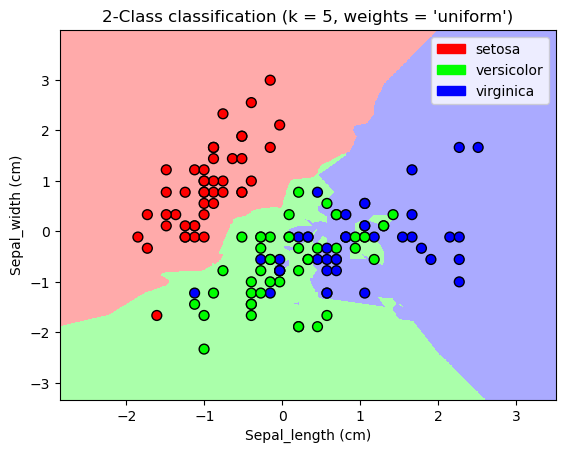

In [30]:
def plot_iris_knn(data,targets,n_neighbors,weights):
    X_mat=data[:,:2]
    y_mat=targets
    
    cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
    cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
    clf= neighbors.KNeighborsClassifier(n_neighbors,weights=weights)
    clf.fit(X_mat,y_mat)
    
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='setosa')
    patch1 = mpatches.Patch(color='#00FF00', label='versicolor')
    patch2 = mpatches.Patch(color='#0000FF', label='virginica')
    plt.legend(handles=[patch0, patch1, patch2])
    plt.xlabel('Sepal_length (cm)')
    plt.ylabel('Sepal_width (cm)')
    plt.title("2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plot_iris_knn(train_data, train_targets, 5, 'uniform')

c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


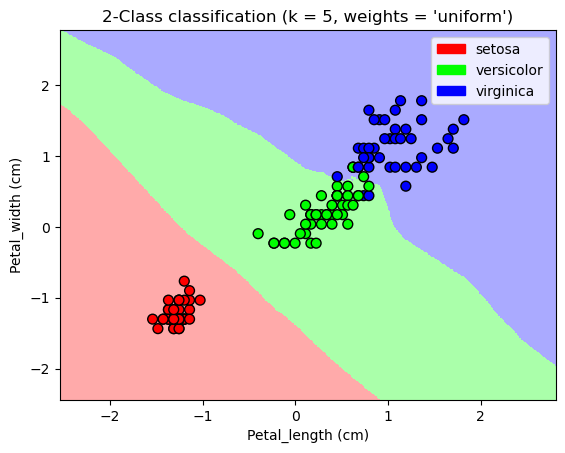

In [34]:
def plot_iris_knn(data,targets, n_neighbors, weights):
    X_mat = data[:,2:]
    y_mat = targets
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='setosa')
    patch1 = mpatches.Patch(color='#00FF00', label='versicolor')
    patch2 = mpatches.Patch(color='#0000FF', label='virginica')
    plt.legend(handles=[patch0, patch1, patch2])
    plt.xlabel('Petal_length (cm)')
    plt.ylabel('Petal_width (cm)')
    plt.title("2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plot_iris_knn(train_data,train_targets, 5, 'uniform')